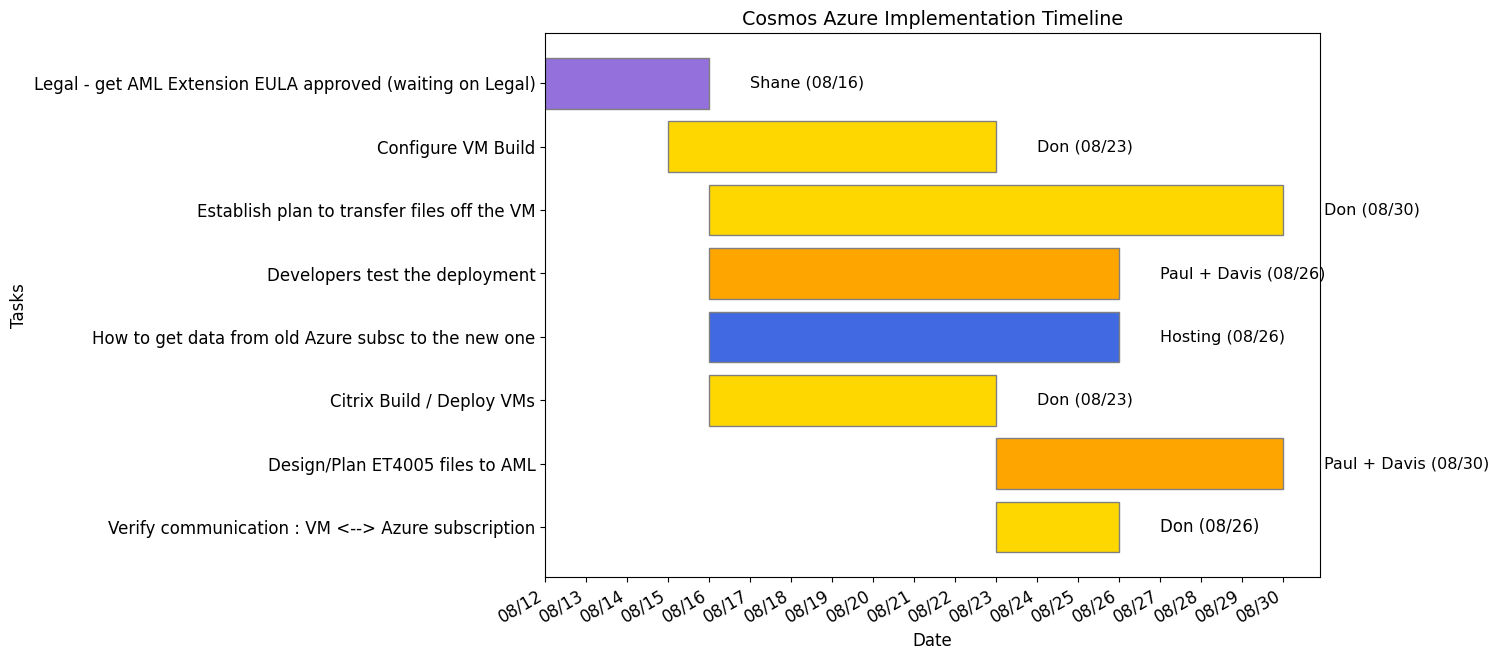

In [78]:


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define the tasks, start dates, due dates, and assigned individuals
tasks = [
    "Configure VM Build",
    "Citrix Build / Deploy VMs",
    "How to get data from old Azure subsc to the new one",
    "Legal - get AML Extension EULA approved (waiting on Legal)",
    "Verify communication : VM <--> Azure subscription",
    "Developers test the deployment",
    "Establish plan to transfer files off the VM",
    "Design/Plan ET4005 files to AML"
]
start_dates = [
   datetime(2020,8 ,15), datetime(2020 ,8 ,16), datetime(2020 ,8 ,16),
   datetime(2020 ,8 ,12), datetime(2020 ,8 ,23), datetime(2020 ,8 ,16),
   datetime(2020 ,8 ,16),datetime(2020 ,8 ,23)
]
due_dates = [
   datetime(2020,8 ,23), datetime(2020 ,8 ,23), datetime(2020 ,8 ,26),
   datetime(2020 ,8 ,16), datetime(2020 ,8 ,26), datetime(2020 ,8 ,26),
   datetime(2020 ,8 ,30),datetime(2020 ,8 ,30)
]
assigned_to = ["Don", "Don", "Hosting", "Shane", "Don", "Paul + Davis", "Don", "Paul + Davis"]

# Calculate durations
durations = [(due_dates[i] - start_dates[i]).days for i in range(len(tasks))]

# Sort tasks by start date in descending order
sorted_indices = sorted(range(len(start_dates)), key=lambda i: start_dates[i], reverse=True)
tasks = [tasks[i] for i in sorted_indices]
start_dates = [start_dates[i] for i in sorted_indices]
due_dates = [due_dates[i] for i in sorted_indices]
assigned_to = [assigned_to[i] for i in sorted_indices]
durations = [durations[i] for i in sorted_indices]

# Assign unique colors to each person
colors = {
    "Don": "gold",
    "Hosting": "royalblue",
    "Shane": "mediumpurple",
    "Paul + Davis": "orange"
}

# Create figure and plot space
plt.figure(figsize=(10, 8))
bar_height = 0.8

# Create a Gantt chart by plotting bars for each task with corresponding start date and duration
for i in range(len(tasks)):
   end_date = due_dates[i]
   plt.barh(tasks[i], durations[i], left=start_dates[i], color=colors[assigned_to[i]], edgecolor='grey',height=bar_height)
   plt.text(end_date + timedelta(days=1), i, f"{assigned_to[i]} ({end_date.strftime('%m/%d')})", 
            va='center', ha='left', color='black')
   plt.rc('font', size=11.5)


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Tasks')
plt.title('Cosmos Azure Implementation Timeline')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

